# 写入文件
with open('data.json', 'w') as f:
    json.dump(data, f)

# 从文件读取
with open('data.json', 'r') as f:
    data = json.load(f)


In [3]:
import  json
with open('hw4_data.json','r') as f:
    data = json.load(f)
nodes = data['nodes']
edges = data['edges']
network = {}
for people in nodes:
    network[people[0]] = []
for edge in edges:
    network[edge[0]].append([edge[1]])
    network[edge[1]].append([edge[0]])
print(network)
friends_list = []
for people in network:
    friends_list.append(network[people])
    print(f"{people}:",friends_list)
    friends_list.clear()

{'Yanyan-Wang': [['Aarebecca'], ['pomelo-nwu'], ['yangzy0603'], ['tyn1998'], ['yvonneyx'], ['lidongze0629'], ['RackweLLizm'], ['yikenie'], ['yubo0923'], ['Maple0817'], ['wj23027'], ['frank-zsy'], ['andyhuang18'], ['bifenglin']], 'Aarebecca': [['Yanyan-Wang'], ['pomelo-nwu'], ['yangzy0603'], ['yvonneyx'], ['lidongze0629'], ['tyn1998'], ['RackweLLizm'], ['yikenie'], ['yubo0923'], ['Maple0817'], ['frank-zsy']], 'pomelo-nwu': [['Yanyan-Wang'], ['Aarebecca'], ['yangzy0603'], ['tyn1998'], ['lidongze0629'], ['yvonneyx'], ['RackweLLizm'], ['yikenie'], ['bifenglin'], ['frank-zsy'], ['yubo0923'], ['wj23027'], ['andyhuang18'], ['Maple0817'], ['will-ww'], ['zhicheng-ning'], ['PureNatural'], ['xiaoya-yaya'], ['xgdyp'], ['longyanz'], ['Zzzzzhuzhiwei'], ['birdflyi'], ['lhbvvvvv'], ['zhaosj975']], 'tyn1998': [['andyhuang18'], ['pomelo-nwu'], ['frank-zsy'], ['wj23027'], ['bifenglin'], ['Yanyan-Wang'], ['will-ww'], ['Zzzzzhuzhiwei'], ['lhbvvvvv'], ['zhicheng-ning'], ['PureNatural'], ['yangzy0603'], ['xg

第一步：表示社交关系网络并找出每一个用户的直接朋友

In [14]:
degrees = {}
influce_degrees = {}
for people,friend in network.items():
    degrees[people] = len(friend)
top_5_d = sorted(degrees.items(),key=lambda x:x[1],reverse=True)[:5]
print(top_5_d)
for people in nodes:
    influce_degrees[people[0]] = people[1]
top_5_i = sorted(influce_degrees.items(),key=lambda x:x[1],reverse=True)[:5]
print(top_5_i)
weighted_score = {}
for people in network:
    weighted_score[people] = degrees[people] * 0.5 + influce_degrees[people] * 0.5
top_5 = sorted(weighted_score.items(),key=lambda x : x[1],reverse=True)
print(top_5)            

[('tyn1998', 30), ('frank-zsy', 30), ('pomelo-nwu', 24), ('andyhuang18', 23), ('wj23027', 23)]
[('Yanyan-Wang', 50.95), ('Aarebecca', 23.82), ('pomelo-nwu', 22.36), ('tyn1998', 16.64), ('frank-zsy', 15.8)]
[('Yanyan-Wang', 32.475), ('tyn1998', 23.32), ('pomelo-nwu', 23.18), ('frank-zsy', 22.9), ('Aarebecca', 17.41), ('will-ww', 15.25), ('andyhuang18', 14.635), ('wj23027', 13.28), ('Zzzzzhuzhiwei', 13.105), ('zhicheng-ning', 12.675), ('stevending1st', 12.14), ('xgdyp', 11.79), ('lhbvvvvv', 11.56), ('bifenglin', 11.004999999999999), ('PureNatural', 9.685), ('birdflyi', 9.64), ('xiaoya-yaya', 9.195), ('yangzy0603', 8.915), ('zhaosj975', 8.0), ('longyanz', 7.87), ('wxharry', 7.395), ('lidongze0629', 7.365), ('yikenie', 6.655), ('RackweLLizm', 6.64), ('Maple0817', 6.3149999999999995), ('stealth-bombeer', 6.18), ('yvonneyx', 6.11), ('yubo0923', 6.0600000000000005), ('pranavshuklaa', 5.895), ('Vlad116', 5.895), ('kunal8411', 5.18)]


第二步：完成度中心分析

In [56]:
def new_friend(people): 
    friends = []
    for friend in network[people]:
        for i in range(len(friend)):
            friends.append(friend[i])
    friends = set(friends)
    _friend = {}
    for friend in friends:
        for t_friend in network[friend]:
            for name in t_friend:
                if name not in friends and name != people:
                    _friend[name] = _friend.get(name, 0) + 1
    new_friends = sorted(_friend.items(), key=lambda x: x[1], reverse=True)
    return new_friends
new_friends_yanyan = new_friend('Yanyan-Wang')
print(new_friends_yanyan)


connection_strength = {user: 0 for user in network}
for edge in edges:
    if edge[0] == "Yanyan-Wang" or edge[1] == "Yanyan-Wang":
        connection_strength[edge[0]] += edge[2]
        connection_strength[edge[1]] += edge[2]

top_5_strength = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[1:6]
print(top_5_strength)

                    
        
    

[('Zzzzzhuzhiwei', 6), ('xgdyp', 6), ('will-ww', 6), ('PureNatural', 6), ('birdflyi', 6), ('lhbvvvvv', 6), ('zhicheng-ning', 6), ('xiaoya-yaya', 6), ('zhaosj975', 6), ('longyanz', 6), ('stevending1st', 5), ('wxharry', 4), ('pranavshuklaa', 4), ('stealth-bombeer', 4), ('kunal8411', 4), ('Vlad116', 4)]
[('Aarebecca', 25.3), ('pomelo-nwu', 25.09), ('yangzy0603', 11.85), ('tyn1998', 9.62), ('yvonneyx', 7.39)]


找出共友数目的排序并找出连接强度最高的5名用户

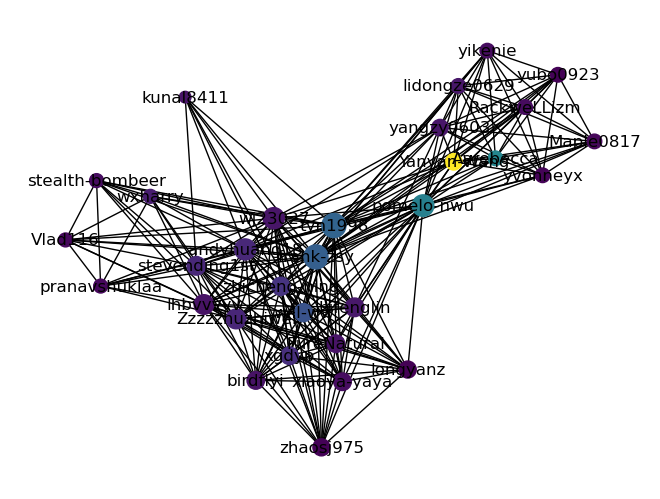

In [65]:
import networkx as nx
import matplotlib.pyplot as plt

zkxshuai = nx.Graph()
for edge in edges:
    zkxshuai.add_edge(edge[0], edge[1], weight=edge[2])

pos = nx.spring_layout(zkxshuai)
nx.draw(zkxshuai, pos, with_labels=True, node_size=[degrees[user] * 10 for user in zkxshuai.nodes()],
        node_color=[influce_degrees[user] for user in zkxshuai.nodes()], cmap=plt.cm.viridis)
plt.show()